# Importing Python libraries

In [44]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import cm
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------------------------------------------------------

# Loading dataset

In [3]:
data = yf.Ticker("TSLA")
data = data.history(period='10y')

# ------------------------------------------------------------------------------------------------------

# Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [4]:
data.head()

Open   High    Low  Close   Volume  Dividends  Stock Splits
Date                                                                    
2011-07-21  5.782  5.832  5.620  5.740  5057500          0           0.0
2011-07-22  5.740  5.908  5.710  5.858  2917500          0           0.0
2011-07-25  5.802  5.850  5.688  5.698  3366500          0           0.0
2011-07-26  5.662  5.754  5.594  5.600  3803000          0           0.0
2011-07-27  5.700  5.700  5.502  5.528  4792500          0           0.0

### Five last records of data

In [5]:
data.tail()

Open        High         Low       Close    Volume  \
Date                                                                   
2021-07-14  670.750000  678.609985  652.840027  653.380005  21641200   
2021-07-15  658.390015  666.140015  637.880005  650.599976  20209600   
2021-07-16  654.679993  656.700012  642.200012  644.219971  16339800   
2021-07-19  629.890015  647.200012  621.289978  646.219971  21240800   
2021-07-20  651.989990  662.391602  640.549988  660.500000  14999476   

            Dividends  Stock Splits  
Date                                 
2021-07-14          0           0.0  
2021-07-15          0           0.0  
2021-07-16          0           0.0  
2021-07-19          0           0.0  
2021-07-20          0           0.0

### Columns/features in data

In [6]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

### Length of data

In [7]:
print('lenght of data is', len(data))

lenght of data is 2516


### Shape of data

In [8]:
data.shape

(2516, 7)

### Data information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2011-07-21 to 2021-07-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2516 non-null   float64
 1   High          2516 non-null   float64
 2   Low           2516 non-null   float64
 3   Close         2516 non-null   float64
 4   Volume        2516 non-null   int64  
 5   Dividends     2516 non-null   int64  
 6   Stock Splits  2516 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 157.2 KB


### Data types of all coloumns

In [10]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits    float64
dtype: object

### Checking missing Values

In [11]:
data[data.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []

### Count of missing values

In [12]:
np.sum(data.isnull().any(axis=1))

0

### Is there any missing values?

In [13]:
data.isnull().values.any()

False

### Counts of missing values in each column

In [14]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Data Description

In [15]:
data.describe()

Open         High          Low        Close        Volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean    101.431470   103.618155    99.049677   101.467502  3.430459e+07   
std     172.319269   176.127905   167.950173   172.333186  2.883165e+07   
min       4.386000     4.622000     4.300000     4.390000  1.198000e+06   
25%      35.274999    36.112500    34.465499    35.521501  1.634258e+07   
50%      47.485001    48.550001    46.820999    47.701000  2.752100e+07   
75%      65.906000    67.260498    64.916000    66.181499  4.285412e+07   
max     891.380005   900.400024   871.599976   883.090027  3.046940e+08   

       Dividends  Stock Splits  
count     2516.0   2516.000000  
mean         0.0      0.001987  
std          0.0      0.099682  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      5.000000

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### Counts Distribution of top 10 CLOSE values

In [23]:
data["Close"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

# ------------------------------------------------------------------------------------------------------

# Data Preparation and Feature Extraction

# ------------------------------------------------------------------------------------------------------

### stochastic features 

In [24]:

from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

def stochastic(df, k, d):
    low_min  = df['Low'].rolling(window=k).min()
    high_max = df['High'].rolling( window=k).max()
    df['stochastic_k'] = 100 * (df['Close'] - low_min)/(high_max - low_min)
    df['stochastic_d'] = df['stochastic_k'].rolling(window=d).mean()
    return df

stochs = stochastic(data, k=14, d=3)
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_k.tail(365), name='K stochastic'))
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_d.tail(365), name='D stochastic'))
fig.show()

### EMA, MACD, MACD single features 

In [45]:

EMA_12 = pd.Series(data['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(data['Close'].ewm(span=26, min_periods=26).mean())
MACD = pd.Series(EMA_12 - EMA_26)
data['MACD']=pd.Series(EMA_12 - EMA_26)
MACD_signal = pd.Series(MACD.ewm(span=9, min_periods=9).mean())
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD, name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD_signal, name='Signal line'), row=2, col=1)
fig.show()

In [46]:
data['MACD'].plot()

<AxesSubplot:xlabel='Date', ylabel='Close'>

### Moving average features

In [27]:
data['EMA_50'] = data['Close'].ewm(50).mean().shift()
data['EMA_200'] =data['Close'].ewm(200).mean().shift()
data['MA_50'] = data['Close'].rolling(50).mean()
data['MA_200'] = data['Close'].rolling(200).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_50, name='EMA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_200, name='EMA 200'))
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.MA_50, name='MA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.MA_200, name='MA 200'))

fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

### Relative Strength Index RSI 7 and 14 features

In [29]:
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi


data['RSI 7'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 7']))
fig.show()

In [30]:
data['RSI 14'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 14']))
fig.show()

### Bollinger bands features

In [31]:
def bbands(price, length=30, numsd=2):
    ave = price.rolling(window = length, center = False).mean()
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

data['BB_Middle_Band'], data['BB_Upper_Band'], data['BB_Lower_Band'] = bbands(data['Close'], length=20, numsd=1)

In [32]:
fig = go.Figure(go.Scatter(x=data.index, y=data['BB_Middle_Band']))
fig.show()

### Calculation of Aroon Oscillator features

In [33]:
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df.index):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [34]:
listofzeros = [0] * 25
up, down = aroon(data)
aroon_list = [x - y for x, y in zip(up,down)]
if len(aroon_list)==0:
    aroon_list = [0] * data.shape[0]
    data['Aroon_Oscillator'] = aroon_list
else:
    data['Aroon_Oscillator'] = listofzeros+aroon_list

In [35]:
fig = go.Figure(go.Scatter(x=data.index, y=data['Aroon_Oscillator']))
fig.show()

### Average Directional Index features

In [47]:
data['ATR'] = data['Close'].rolling(window=14).mean()
def DMI(df, period):
    df['UpMove'] = df['High'] - df['High'].shift(1)
    df['DownMove'] = df['Low'].shift(1) - df['Low']
    df['Zero'] = 0

    df['PlusDM'] = np.where((df['UpMove'] > df['DownMove']) & (df['UpMove'] > df['Zero']), df['UpMove'], 0)
    df['MinusDM'] = np.where((df['UpMove'] < df['DownMove']) & (df['DownMove'] > df['Zero']), df['DownMove'], 0)

    df['plusDI'] = 100 * (df['PlusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
    df['minusDI'] = 100 * (df['MinusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()

    df['ADX'] = 100 * (abs((df['plusDI'] - df['minusDI'])/(df['plusDI'] + df['minusDI']))).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
DMI(data, 14)

In [48]:
fig = go.Figure(go.Scatter(x=data.index, y=data['ADX']))
fig.show()

# Final Data after features extraction and preparation

In [103]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'stochastic_k', 'stochastic_d', 'MACD', 'EMA_50', 'EMA_200', 'MA_50',
       'MA_200', 'RSI 7', 'RSI 14', 'BB_Middle_Band', 'BB_Upper_Band',
       'BB_Lower_Band', 'Aroon_Oscillator', 'ATR', 'UpMove', 'DownMove',
       'Zero', 'PlusDM', 'MinusDM', 'plusDI', 'minusDI', 'ADX'],
      dtype='object')

In [95]:
data.to_csv("TSLA.csv")

### Normalize the Data

In [49]:
# In this step I would perform feature scaling/normalization of feature variables using sklearn's MinMaxScaler function.
def normalize_featuresDF(df):
    """
    It performs scaling/normalization of the feature columns using sklearn's MinMazScaler function.
    Range format is from 0 to 1
    args:
        df : featuers columsn datafrane
    return:
        normalized_features_df : normalized data frame ..
    
    """
    scaler = MinMaxScaler()
    feature_columns = df.columns
    feature_minmax_data = scaler.fit_transform(df)
    normalized_features_df = pd.DataFrame(columns=feature_columns, data=feature_minmax_data, index=df.index)
    
    
    return normalized_features_df

### Split the data into Train, Test and Validation sets

#### split validation set from complete data

In [246]:
def split_ValidationSet(features_df, target_df, length=10):
    """
    method is to separate validation set from the complete df
    args:
        features_df: full features_df
        target_df :  full target_dt
        length: prediction length
    returns : 
        validation_x : returns features validations sets
        validation_y : returns target validations sets
    """
    #need to shift target array because we are prediction n + 1 days price
    target_df = target_df.shift(-1)
    #split validation set . i am spliting 10% latest data for validation.
    #target
    validation_y = target_df[-length:-1]
    validation_x = features_df[-length:-1]
    
    return validation_x, validation_y

#Now get final_features_df and final_target_df by excluding validation set
def split_Final_df(normalized_features_df, target_df, v_length=90):
    """
    This method will be having remaining data after the validation set.
    args:
        features_df: normalized features_df
        target_df: complete target_df
        v_length: validation set length
    return: 
        final_features_df : set of feature df excluding validation set
        final_target_df : set of target df excluding validation set
    """
    final_features_df = normalized_features_df[:-v_length]
    final_target_df = target_df[:-v_length]
    
    return final_features_df, final_target_df


### Train and Test split using Sklearn's Timeseries split

In [286]:
#Split final set into training and testing sets
#splitting training and testing set using sklearn's TimeSeries split
def split_Train_Test_DF(final_features_df, final_target_df, n_splits=90):
    """
    Using sklearn's timeseries split to split the training and testing sets
    args:
        final_features_df: features_df after splitting validation set
        final_target_df: target_df after splitting validation set
    
    return: 
        x_train : traing feature set
        y_train : training target set
        x_test : testing feature set
        y_test : testing target set
    """
    ts_split = TimeSeriesSplit(n_splits)
    for train_index, test_index in ts_split.split(final_features_df):
        x_train, x_test = final_features_df[:len(train_index)], final_features_df[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = final_target_df[:len(train_index)].values.ravel(), final_target_df[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        
    return x_train, y_train, x_test, y_test

### Visualizing the datasets for sanity check

In [287]:
def plot_3DataSets():
    """
    Method displays the plot of the 3 different sets into single plot.
    This is just for sanity check.
    This is time series data so, sets should not be mixed.
    
    """
    t=y_test.astype(np.float)
    v = target_df[-90:-1].values.ravel()
    plt.plot(y_train, label='training_set')
    plt.plot([None]*len(y_train) + [x for x in t], label='test_set')
    plt.plot([None]*(len(y_train)+len(t)) + [x for x in v], label='validation_set')
    plt.xlabel('Days')
    plt.ylabel('price')
    plt.title('Split dataset into training/validation/test set')
    plt.legend()

### Implementing model prediction and evaluation


#### Method for validating result with evaluation metrics

In [288]:
#Method to evaluate the benchmark model and solution model with validate data set
def model_validateResult(model, model_name):
    """
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    args:
        model : it takes the model to validate
        model_name: give the model name
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """
    if model_name in [ "LSTM", "LSTM_Tuned"]:
        x_train_t, x_test_t, validation_x_t, validation_y_t = convert_LSTM_data(x_train, x_test, validation_x, validation_y)
        model = model(x_train, y_train, validation_x)
        prediction = model.predict(validation_x_t)
    else:
        model = model(x_train, y_train, validation_x)
        prediction = model.predict(validation_x)
    
    RMSE_Score = np.sqrt(mean_squared_error(validation_y, prediction))
    
    R2_Score = r2_score(validation_y, prediction)
    
    #Ploting trendline for actual vs prediction
    plt.plot(validation_y.index, prediction,'r', label='Predicted')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.plot(figsize = (15,8))
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')

    plt.show()
    print(model_name + ' RMSE: ', RMSE_Score)
    print(model_name + ' R2 score: ', R2_Score)
    
    return RMSE_Score, R2_Score


#Method to evaluate the final model with testing data set
def bestModel_validateResult(model, model_name):
    """
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    USing testing data set for evaluation
    args:
        model : it takes the model to validate
        model_name: give the model name
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """
    
    #I am giving testing set for the evaluation 
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)
    
    RMSE_Score = np.sqrt(mean_squared_error(y_test, prediction))
    
    R2_Score = r2_score(y_test, prediction)
    
    plt.title(model_name + 'Prediction Vs Actual')
    plt.plot(y_test, label='test data')
    plt.plot(prediction, label='prediction')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend();
    

    print(model_name + ' RMSE: ', RMSE_Score)
    print(model_name + ' R2 score: ', R2_Score)
     
    return RMSE_Score, R2_Score


def value_Compare(model):
    """
    this method is used to create final data frame using testing value with predicted value.
    args:
        model : trained model to create df
    return : 
        df : df with test value and predicted value
    """
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)
    col1 = pd.DataFrame(y_test, columns=['True_value'])
    col2 = pd.DataFrame(prediction, columns = ['Predicted_value'])
    df = pd.concat([col1, col2], axis=1)
    
    return df

### Build Models

#### Benchmark Model

##### DecisionTreeRegressor

In [289]:
#modeling DecisionTreeRegressor with default parameters for benchmark

def model_Benchmark_DTR(x_train, y_train, validation_x, random_state=0):
    """
    Method is to model DecisionTreeRegressor
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
        random_state : default parameter it controls the randomness of the estimater
    
    return: 
        model : returns the trained model
        
    """
    #initialize DTR
    dtr = DecisionTreeRegressor(random_state=0)   
    #fit the data
    model = dtr.fit(x_train, y_train)
    
    return model

#### Solution Model

##### Support Vector Regressor (SVR)


In [290]:
def model_SVR(x_train, y_train, validation_x):
    
    """
    This method uses svr algorithm to trian the data.
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    svr_model = SVR(kernel='linear')
    model = svr_model.fit(x_train, y_train)
#     prediction = model.predict(validation_x)
    
    return model

def model_SVRTuning(x_train, y_train, validation_x):
    """
    This method uses svr algorithm to trian the data.
    Using different set of C and epsilon.
    Using GridSearchCV to select best hyperparameters
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    hyperparameters_linearSVR = {
        'C':[0.5, 1.0, 10.0, 50.0, 100.0, 120.0,150.0, 300.0, 500.0,700.0,800.0, 1000.0],
        'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
    }
    
    grid_search_SVR_feat = GridSearchCV(estimator=model_SVR(x_train, y_train, validation_x),
                           param_grid=hyperparameters_linearSVR,
                           cv=TimeSeriesSplit(n_splits=10),
    )

    model = grid_search_SVR_feat.fit(x_train, y_train)
    print(grid_search_SVR_feat.best_params_)
    
    return model

##### Random Forest

In [291]:
def model_randomForest(x_train, y_train, validation_x):
    
    """
    This method uses random forest algorithm to trian the data.
    
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    randomForest_model = RandomForestRegressor(n_estimators=50, random_state=0)
    model = randomForest_model.fit(x_train, y_train)
#     prediction = model.predict(validation_x)
    
    return model

def model_randomForestTuning(x_train, y_train, validation_x):
    """
    This method uses svr algorithm to trian the data.
    Using different set of hyperparameters 
    Using GridSearchCV to select best hyperparameters
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    hyper_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10,13, 15, 20],
    }
    
    grid_search_RF_feat = GridSearchCV(estimator=model_randomForest(x_train, y_train, validation_x),
                           param_grid=hyper_parameters,
                           cv=TimeSeriesSplit(n_splits=10),
        )
    model = grid_search_RF_feat.fit(x_train, y_train)
    print(model.best_params_)
    
    return model


##### LSTM

In [292]:
#LSTM model need feature input in array
#convert data to array

def convert_LSTM_data(x_train, x_test, validation_x, validation_y):
# def convert_LSTM_data():
    """
    Method is used to format the data sets into LSTM input data format.
    
    args:
        x_train : final feautre training set
        x_test : final feature testing set
        validation_x : validation feature test
        validation_y: validation target test
    return:
        formats the input data into LSTM input format
    """
    
    x_train =np.array(x_train)
    x_test =np.array(x_test)
    validation_x =np.array(validation_x)
    validation_y = np.array(validation_y)
    
    #reshape sets
    #Need to check this ?????
    #shpae pf LSTM is (number of records, number of times steps, feature dimension)   
    x_train_lstm = np.reshape(x_train, (x_train.shape[0],1,  x_train.shape[1]))
    x_test_lstm = np.reshape(x_test, (x_test.shape[0],1, x_test.shape[1]))
    
    validation_x_lstm = np.reshape(validation_x, (validation_x.shape[0], 1, validation_x.shape[1]))
    validation_y_lstm = np.reshape(validation_y, (validation_y.shape[0],1, validation_y.shape[1]))
    
    return x_train_lstm, x_test_lstm, validation_x_lstm, validation_y_lstm

In [293]:
# LSTM model prediction funciton
def model_LSTM(x_train, y_train, validation_x, convertion_model = convert_LSTM_data):
    """
    args:
        x_train : final feautre training set
        x_test : final feature testing set
        validation_x : validation feature test
        convertion_model : this is just method to format the LSTM data
    return:
        return : returns the trained model
    """
    K.clear_session()
    x_train_t, x_test_t, validation_x_t, validation_y_t = convertion_model(x_train, x_test, validation_x, validation_y)
    # instantiate the Sequential class
    model = Sequential()
    #Create LSTM and Drop out Layers, return_sequences = True because we will add more layers to the model
    #input_shape(number of time steps, number of indicators/features)
    model.add(LSTM(units=50, input_shape=(1, x_train.shape[1]), activation='relu', return_sequences=True))
    #dropout layter is to avoid over-fitting
    model.add(Dropout(0.2))
    #Add few more laters and dropouts to the model
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    
    #Create Dense layer, number of neurons in dense layer  = 1 becasue we want to predict one value
    model.add(Dense(units = 1))
    #need to compile before training the data
    #
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
    
    history_model = model.fit(x_train_t, y_train, epochs=200, batch_size=32,callbacks=[early_stop])
#     prediction = model_lstm.predict(validation_x_t)
   
    return model



#      
# LSTM model prediction funciton
def model_LSTMTuning(x_train, y_train, validation_x, convertion_model = convert_LSTM_data):
    """
    Using 0.5 dropout layers and batch size 16 for the tuning
    args:
        x_train : final feautre training set
        x_test : final feature testing set
        validation_x : validation feature test
        convertion_model : this is just method to format the LSTM data
    return:
        return : returns the trained model
    """
    K.clear_session()
    x_train_t, x_test_t, validation_x_t, validation_y_t = convertion_model(x_train, x_test, validation_x, validation_y)
    # instantiate the Sequential class
    model = Sequential()
    #Create LSTM and Drop out Layers, return_sequences = True because we will add more layers to the model
    #input_shape(number of time steps, number of indicators/features)
    model.add(LSTM(units=50, input_shape=(1, x_train.shape[1]), activation='relu', return_sequences=True))
    #dropout layter is to avoid over-fitting
    model.add(Dropout(0.5))
    #Add few more laters and dropouts to the model
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.5))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.5))

    model.add(LSTM(units=50))
    model.add(Dropout(0.5))
    
    #Create Dense layer, number of neurons in dense layer  = 1 becasue we want to predict one value
    model.add(Dense(units = 1))
    #need to compile before training the data
    #
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
      
    history_model = model.fit(x_train_t, y_train, epochs=200, batch_size=16,callbacks=[early_stop])
 
    return model

In [294]:
#reading CSV, assigning starbucks variable to starbucks data and att to att data.
#Fixing date by parsing date columns
TSLA = data.

SyntaxError: invalid syntax (<ipython-input-294-fe7e578e01e3>, line 3)

In [295]:

# Import second time series dataset
# Import first time series dataset
# data = pd.read_csv(
#     "data/data1.csv",
#     parse_dates=["Date"],
#     index_col="Date",
# ).replace(np.NaN, 0)

# >>> data1.head()

In [296]:
tsla = pd.read_csv('TSLA.csv')

In [297]:
'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'stochastic_k', 'stochastic_d', 'MACD', 'EMA_50', 'EMA_200', 'MA_50',
       'MA_200', 'RSI 7', 'RSI 14', 'BB_Middle_Band', 'BB_Upper_Band',
       'BB_Lower_Band', 'Aroon_Oscillator', 'ATR', 'UpMove', 'DownMove',
       'Zero', 'PlusDM', 'MinusDM', 'plusDI', 'minusDI', 'ADX'

IndentationError: unexpected indent (<ipython-input-297-59da4e51002c>, line 2)

In [298]:
tsla


Date        Open        High         Low       Close    Volume  \
0     2011-07-21    5.782000    5.832000    5.620000    5.740000   5057500   
1     2011-07-22    5.740000    5.908000    5.710000    5.858000   2917500   
2     2011-07-25    5.802000    5.850000    5.688000    5.698000   3366500   
3     2011-07-26    5.662000    5.754000    5.594000    5.600000   3803000   
4     2011-07-27    5.700000    5.700000    5.502000    5.528000   4792500   
...          ...         ...         ...         ...         ...       ...   
2511  2021-07-14  670.750000  678.609985  652.840027  653.380005  21641200   
2512  2021-07-15  658.390015  666.140015  637.880005  650.599976  20209600   
2513  2021-07-16  654.679993  656.700012  642.200012  644.219971  16339800   
2514  2021-07-19  629.890015  647.200012  621.289978  646.219971  21240800   
2515  2021-07-20  651.989990  662.391602  640.549988  660.500000  14999476   

      Dividends  Stock Splits  stochastic_k  stochastic_d  ...  \
0             0           0.0           NaN           NaN  ...   
1             0           0.0           NaN           NaN  ...   
2             0           0.0           NaN           NaN  ...   
3             0           0.0           NaN           NaN  ...   
4             0           0.0           NaN           NaN  ...   
...         ...           ...           ...           ...  ...   
2511          0           0.0     41.387971     61.637481  ...   
2512          0           0.0     37.892836     46.576114  ...   
2513          0           0.0     29.871706     36.384171  ...   
2514          0           0.0     32.386165     33.383569  ...   
2515          0           0.0     50.339438     37.532437  ...   

      Aroon_Oscillator         ATR     UpMove   DownMove  Zero     PlusDM  \
0                  0.0         NaN        NaN        NaN     0   0.000000   
1                  0.0         NaN   0.076000  -0.090000     0   0.076000   
2                  0.0         NaN  -0.058000   0.022000     0   0.000000   
3                  0.0         NaN  -0.096000   0.094000     0   0.000000   
4                  0.0         NaN  -0.054000   0.092000     0   0.000000   
...                ...         ...        ...        ...   ...        ...   
2511              48.0  669.950003 -14.670044  13.459961     0   0.000000   
2512              48.0  667.862858 -12.469971  14.960022     0   0.000000   
2513              48.0  665.887857  -9.440002  -4.320007     0   0.000000   
2514              48.0  662.852142  -9.500000  20.910034     0   0.000000   
2515              48.0  661.404999  15.191589 -19.260010     0  15.191589   

        MinusDM    plusDI   minusDI        ADX  
0      0.000000       NaN       NaN        NaN  
1      0.000000       NaN       NaN        NaN  
2      0.022000       NaN       NaN        NaN  
3      0.094000       NaN       NaN        NaN  
4      0.092000       NaN       NaN        NaN  
...         ...       ...       ...        ...  
2511  13.459961  1.017420  0.872613  29.209246  
2512  14.960022  0.881764  1.054929  26.506848  
2513   0.000000  0.764196  0.914272  24.164770  
2514  20.910034  0.662303  1.212976  24.858117  
2515   0.000000  0.880245  1.051246  22.724146  

[2516 rows x 30 columns]

In [299]:
tsla["Date"] = pd.to_datetime(tsla["Date"], format="%Y-%m-%d", errors="coerce")

In [300]:
assert tsla["Date"].dtype == "datetime64[ns]"

In [301]:
# Import first time series dataset
tsla = pd.read_csv("TSLA.csv",parse_dates=["Date"],index_col="Date").dropna()

tsla

Open        High         Low       Close    Volume  \
Date                                                                   
2012-05-04    6.464000    6.492000    6.280000    6.366000   6237500   
2012-05-07    6.392000    6.516000    6.322000    6.494000   5790000   
2012-05-08    6.500000    6.546000    5.874000    6.038000  15486000   
2012-05-09    6.060000    6.154000    5.952000    6.012000   9739500   
2012-05-10    6.594000    6.936000    6.480000    6.592000  27781500   
...                ...         ...         ...         ...       ...   
2021-07-14  670.750000  678.609985  652.840027  653.380005  21641200   
2021-07-15  658.390015  666.140015  637.880005  650.599976  20209600   
2021-07-16  654.679993  656.700012  642.200012  644.219971  16339800   
2021-07-19  629.890015  647.200012  621.289978  646.219971  21240800   
2021-07-20  651.989990  662.391602  640.549988  660.500000  14999476   

            Dividends  Stock Splits  stochastic_k  stochastic_d       MACD  \
Date                                                                         
2012-05-04          0           0.0     24.483831     51.425811  -0.085158   
2012-05-07          0           0.0     43.362856     36.971526  -0.087196   
2012-05-08          0           0.0     16.334669     28.060452  -0.124174   
2012-05-09          0           0.0     13.745025     24.480850  -0.153805   
2012-05-10          0           0.0     67.608293     32.562663  -0.129000   
...               ...           ...           ...           ...        ...   
2021-07-14          0           0.0     41.387971     61.637481  10.036801   
2021-07-15          0           0.0     37.892836     46.576114   8.432826   
2021-07-16          0           0.0     29.871706     36.384171   6.571104   
2021-07-19          0           0.0     32.386165     33.383569   5.197150   
2021-07-20          0           0.0     50.339438     37.532437   5.200611   

            ...  Aroon_Oscillator         ATR     UpMove   DownMove  Zero  \
Date        ...                                                             
2012-05-04  ...             -56.0    6.569429  -0.308000   0.146000     0   
2012-05-07  ...             -56.0    6.572714   0.024000  -0.042000     0   
2012-05-08  ...             -56.0    6.537429   0.030000   0.448000     0   
2012-05-09  ...             -96.0    6.493143  -0.392000  -0.078000     0   
2012-05-10  ...             -92.0    6.490286   0.782000  -0.528000     0   
...         ...               ...         ...        ...        ...   ...   
2021-07-14  ...              48.0  669.950003 -14.670044  13.459961     0   
2021-07-15  ...              48.0  667.862858 -12.469971  14.960022     0   
2021-07-16  ...              48.0  665.887857  -9.440002  -4.320007     0   
2021-07-19  ...              48.0  662.852142  -9.500000  20.910034     0   
2021-07-20  ...              48.0  661.404999  15.191589 -19.260010     0   

               PlusDM    MinusDM    plusDI   minusDI        ADX  
Date                                                             
2012-05-04   0.000000   0.146000  0.692988  1.247012  18.630434  
2012-05-07   0.024000   0.000000  0.649275  1.080743  19.471721  
2012-05-08   0.000000   0.448000  0.562705  1.850357  23.990389  
2012-05-09   0.000000   0.000000  0.487678  1.603643  27.906568  
2012-05-10   0.782000   0.000000  2.029158  1.389824  26.678965  
...               ...        ...       ...       ...        ...  
2021-07-14   0.000000  13.459961  1.017420  0.872613  29.209246  
2021-07-15   0.000000  14.960022  0.881764  1.054929  26.506848  
2021-07-16   0.000000   0.000000  0.764196  0.914272  24.164770  
2021-07-19   0.000000  20.910034  0.662303  1.212976  24.858117  
2021-07-20  15.191589   0.000000  0.880245  1.051246  22.724146  

[2317 rows x 29 columns]

In [302]:
#Get adj_close data for the technical indicators
df_t = tsla['Close']

#calculate technical indicators and adding indicators to the data
final_df = tsla
final_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'stochastic_k', 'stochastic_d', 'MACD', 'EMA_50', 'EMA_200', 'MA_50',
       'MA_200', 'RSI 7', 'RSI 14', 'BB_Middle_Band', 'BB_Upper_Band',
       'BB_Lower_Band', 'Aroon_Oscillator', 'ATR', 'UpMove', 'DownMove',
       'Zero', 'PlusDM', 'MinusDM', 'plusDI', 'minusDI', 'ADX'],
      dtype='object')

In [303]:
#Checking no of null values in each columns
final_df.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Volume              0
Dividends           0
Stock Splits        0
stochastic_k        0
stochastic_d        0
MACD                0
EMA_50              0
EMA_200             0
MA_50               0
MA_200              0
RSI 7               0
RSI 14              0
BB_Middle_Band      0
BB_Upper_Band       0
BB_Lower_Band       0
Aroon_Oscillator    0
ATR                 0
UpMove              0
DownMove            0
Zero                0
PlusDM              0
MinusDM             0
plusDI              0
minusDI             0
ADX                 0
dtype: int64

#### Selecting features df and target df

In [304]:
#getting feature df from final_df
features_df = final_df[['Open', 'High', 'Low', 'Volume', 'RSI 7', 'RSI 14','BB_Middle_Band','BB_Upper_Band','BB_Lower_Band', 
                        'Aroon_Oscillator', 'ATR','UpMove','DownMove','Zero','PlusDM','MinusDM','plusDI','minusDI',
                        'ADX','MA_200','MA_50','EMA_200','stochastic_d','stochastic_k','Stock Splits','Dividends','MACD']]
#getting target df from final_df
target_df = final_df[['Close']]


In [305]:
#Checking no of null values in each columns
final_df.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Volume              0
Dividends           0
Stock Splits        0
stochastic_k        0
stochastic_d        0
MACD                0
EMA_50              0
EMA_200             0
MA_50               0
MA_200              0
RSI 7               0
RSI 14              0
BB_Middle_Band      0
BB_Upper_Band       0
BB_Lower_Band       0
Aroon_Oscillator    0
ATR                 0
UpMove              0
DownMove            0
Zero                0
PlusDM              0
MinusDM             0
plusDI              0
minusDI             0
ADX                 0
dtype: int64

In [306]:
#Check sample of feature and target df
display(features_df.head(5))
display(target_df.head(5))

Open   High    Low    Volume      RSI 7     RSI 14  \
Date                                                              
2012-05-04  6.464  6.492  6.280   6237500  47.091426  47.091426   
2012-05-07  6.392  6.516  6.322   5790000  51.464968  51.464968   
2012-05-08  6.500  6.546  5.874  15486000  37.281154  37.281154   
2012-05-09  6.060  6.154  5.952   9739500  33.404714  33.404714   
2012-05-10  6.594  6.936  6.480  27781500  49.183007  49.183007   

            BB_Middle_Band  BB_Upper_Band  BB_Lower_Band  Aroon_Oscillator  \
Date                                                                         
2012-05-04           6.578          6.708          6.449             -56.0   
2012-05-07           6.572          6.702          6.441             -56.0   
2012-05-08           6.549          6.725          6.373             -56.0   
2012-05-09           6.519          6.731          6.306             -96.0   
2012-05-10           6.514          6.723          6.304             -92.0   

            ...   minusDI        ADX   MA_200    MA_50   EMA_200  \
Date        ...                                                    
2012-05-04  ...  1.247012  18.630434  5.94909  6.84720  6.118301   
2012-05-07  ...  1.080743  19.471721  5.95286  6.84208  6.120253   
2012-05-08  ...  1.850357  23.990389  5.95376  6.82836  6.123191   
2012-05-09  ...  1.603643  27.906568  5.95533  6.81336  6.122523   
2012-05-10  ...  1.389824  26.678965  5.96029  6.81156  6.121659   

            stochastic_d  stochastic_k  Stock Splits  Dividends      MACD  
Date                                                                       
2012-05-04     51.425811     24.483831           0.0          0 -0.085158  
2012-05-07     36.971526     43.362856           0.0          0 -0.087196  
2012-05-08     28.060452     16.334669           0.0          0 -0.124174  
2012-05-09     24.480850     13.745025           0.0          0 -0.153805  
2012-05-10     32.562663     67.608293           0.0          0 -0.129000  

[5 rows x 27 columns]

Close
Date             
2012-05-04  6.366
2012-05-07  6.494
2012-05-08  6.038
2012-05-09  6.012
2012-05-10  6.592

In [307]:
# assert features_df["Date"].dtype == "datetime64[ns]"

# In progress . . . 

### Normalizing the data

In [308]:
from sklearn.preprocessing import MinMaxScaler #For Normalizing the data
from sklearn.model_selection import TimeSeriesSplit #For splitting the data
from sklearn.tree import DecisionTreeRegressor # For Benchmark model
from sklearn.metrics import mean_squared_error, r2_score # For RMSE and R2 Score

from sklearn.svm import SVR #for SVR model
from sklearn.ensemble import RandomForestRegressor #for RandomForest model
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential #Keras for solution LSTM model
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.dates as mdates

In [309]:
#normalizing features df
normalized_features_df = normalize_featuresDF(features_df)

In [310]:
#Get shape of the features and target data
print("feature_df has (rows, columns) : {} ".format(normalized_features_df.shape))
print("target_df has (rows, columns) : {} ".format(target_df.shape))

feature_df has (rows, columns) : (2317, 27) 
target_df has (rows, columns) : (2317, 1) 


In [311]:
#Look at the final feature df and target df before splitting training/test/validation sets
display(normalized_features_df)
display(target_df)

Open      High       Low    Volume     RSI 7    RSI 14  \
Date                                                                     
2012-05-04  0.001237  0.001254  0.001357  0.014393  0.459258  0.459258   
2012-05-07  0.001156  0.001280  0.001406  0.012915  0.507136  0.507136   
2012-05-08  0.001278  0.001314  0.000889  0.044935  0.351864  0.351864   
2012-05-09  0.000781  0.000876  0.000979  0.025958  0.309428  0.309428   
2012-05-10  0.001384  0.001750  0.001588  0.085539  0.482155  0.482155   
...              ...       ...       ...       ...       ...       ...   
2021-07-14  0.750985  0.752198  0.747535  0.065262  0.480672  0.480672   
2021-07-15  0.737035  0.738266  0.730270  0.060534  0.382283  0.382283   
2021-07-16  0.732848  0.727719  0.735256  0.047755  0.387018  0.387018   
2021-07-19  0.704869  0.717104  0.711124  0.063939  0.312923  0.312923   
2021-07-20  0.729812  0.734078  0.733351  0.043328  0.410083  0.410083   

            BB_Middle_Band  BB_Upper_Band  BB_Lower_Band  Aroon_Oscillator  \
Date                                                                         
2012-05-04        0.001098       0.001061       0.001220          0.208333   
2012-05-07        0.001091       0.001054       0.001211          0.208333   
2012-05-08        0.001063       0.001081       0.001128          0.208333   
2012-05-09        0.001028       0.001088       0.001047          0.000000   
2012-05-10        0.001022       0.001078       0.001045          0.020833   
...                    ...            ...            ...               ...   
2021-07-14        0.770498       0.775994       0.757243          0.750000   
2021-07-15        0.773205       0.775270       0.763549          0.750000   
2021-07-16        0.774840       0.774677       0.767523          0.750000   
2021-07-19        0.776198       0.774242       0.770759          0.750000   
2021-07-20        0.778546       0.773730       0.776107          0.750000   

            ...   minusDI       ADX    MA_200     MA_50   EMA_200  \
Date        ...                                                     
2012-05-04  ...  0.221160  0.143041  0.000000  0.001393  0.000242   
2012-05-07  ...  0.189997  0.154855  0.000006  0.001387  0.000247   
2012-05-08  ...  0.334241  0.218311  0.000007  0.001369  0.000253   
2012-05-09  ...  0.288001  0.273306  0.000010  0.001349  0.000251   
2012-05-10  ...  0.247926  0.256067  0.000018  0.001347  0.000250   
...         ...       ...       ...       ...       ...       ...   
2021-07-14  ...  0.150988  0.291600  0.993021  0.805843  0.992416   
2021-07-15  ...  0.185159  0.253650  0.994832  0.805248  0.994377   
2021-07-16  ...  0.158796  0.220760  0.996609  0.804556  0.996299   
2021-07-19  ...  0.214780  0.230497  0.998324  0.804108  0.998144   
2021-07-20  ...  0.184468  0.200529  1.000000  0.803800  1.000000   

            stochastic_d  stochastic_k  Stock Splits  Dividends      MACD  
Date                                                                       
2012-05-04      0.514073      0.244586           0.0        0.0  0.421251  
2012-05-07      0.363544      0.433439           0.0        0.0  0.421234  
2012-05-08      0.270743      0.163067           0.0        0.0  0.420930  
2012-05-09      0.233464      0.137162           0.0        0.0  0.420686  
2012-05-10      0.317629      0.675975           0.0        0.0  0.420890  
...                  ...           ...           ...        ...       ...  
2021-07-14      0.620418      0.413684           0.0        0.0  0.504467  
2021-07-15      0.463567      0.378721           0.0        0.0  0.491280  
2021-07-16      0.357427      0.298483           0.0        0.0  0.475974  
2021-07-19      0.326178      0.323636           0.0        0.0  0.464678  
2021-07-20      0.369385      0.503229           0.0        0.0  0.464707  

[2317 rows x 27 columns]

Close
Date                  
2012-05-04    6.366000
2012-05-07    6.494000
2012-05-08    6.038000
2012-05-09    6.012000
2012-05-10    6.592000
...                ...
2021-07-14  653.380005
2021-07-15  650.599976
2021-07-16  644.219971
2021-07-19  646.219971
2021-07-20  660.500000

[2317 rows x 1 columns]


### Splitting train, test, validation sets

In [312]:
#Splitting validation sets from the final features and target df
validation_x, validation_y = split_ValidationSet(normalized_features_df, target_df)

In [313]:
print("validation_x has (rows, columns) : {} ".format(validation_x.shape))
print("validation_y has (rows, columns) : {} ".format(validation_y.shape))

validation_x has (rows, columns) : (9, 27) 
validation_y has (rows, columns) : (9, 1) 


In [314]:
#splitting train and test set from validation set

final_features_df, final_target_df = split_Final_df(normalized_features_df, target_df)

In [315]:
print("final_features_df has (rows, columns) : {} ".format(final_features_df.shape))
print("final_target_df has (rows, columns) : {} ".format(final_target_df.shape))

final_features_df has (rows, columns) : (2227, 27) 
final_target_df has (rows, columns) : (2227, 1) 


#### Splitting Train and Test using Skleans TimeSeriesSplit

In [316]:
#splitting train and test
x_train, y_train, x_test, y_test = split_Train_Test_DF(final_features_df, final_target_df)

In [317]:
print("Shape of training sets x_train : {}, y_train : {}".format(x_train.shape, y_train.shape))
print("Shape of testing sets x_train : {}, y_train : {}".format(x_test.shape, y_test.shape))

Shape of training sets x_train : (2203, 27), y_train : (2203,)
Shape of testing sets x_train : (24, 27), y_train : (24,)


In [318]:
#Visualizing the train, test and validation sets in single plot
#TSLA
plot_3DataSets()

In [319]:
x_train

Open      High       Low    Volume     RSI 7    RSI 14  \
Date                                                                     
2012-05-04  0.001237  0.001254  0.001357  0.014393  0.459258  0.459258   
2012-05-07  0.001156  0.001280  0.001406  0.012915  0.507136  0.507136   
2012-05-08  0.001278  0.001314  0.000889  0.044935  0.351864  0.351864   
2012-05-09  0.000781  0.000876  0.000979  0.025958  0.309428  0.309428   
2012-05-10  0.001384  0.001750  0.001588  0.085539  0.482155  0.482155   
...              ...       ...       ...       ...       ...       ...   
2021-01-29  0.930723  0.935209  0.894402  0.109347  0.332082  0.332082   
2021-02-01  0.912992  0.934751  0.912244  0.077646  0.548031  0.548031   
2021-02-02  0.947292  0.977766  0.966070  0.074194  0.538455  0.538455   
2021-02-03  0.983793  0.975062  0.978604  0.054371  0.491641  0.491641   
2021-02-04  0.958940  0.950951  0.955937  0.046014  0.500913  0.500913   

            BB_Middle_Band  BB_Upper_Band  BB_Lower_Band  Aroon_Oscillator  \
Date                                                                         
2012-05-04        0.001098       0.001061       0.001220          0.208333   
2012-05-07        0.001091       0.001054       0.001211          0.208333   
2012-05-08        0.001063       0.001081       0.001128          0.208333   
2012-05-09        0.001028       0.001088       0.001047          0.000000   
2012-05-10        0.001022       0.001078       0.001045          0.020833   
...                    ...            ...            ...               ...   
2021-01-29        0.967514       0.997235       0.926745          0.937500   
2021-02-01        0.975457       0.996049       0.944254          0.916667   
2021-02-02        0.983926       0.997726       0.959814          0.895833   
2021-02-03        0.991007       0.995387       0.976775          0.854167   
2021-02-04        0.996574       0.992042       0.991701          0.854167   

            ...   minusDI       ADX    MA_200     MA_50   EMA_200  \
Date        ...                                                     
2012-05-04  ...  0.221160  0.143041  0.000000  0.001393  0.000242   
2012-05-07  ...  0.189997  0.154855  0.000006  0.001387  0.000247   
2012-05-08  ...  0.334241  0.218311  0.000007  0.001369  0.000253   
2012-05-09  ...  0.288001  0.273306  0.000010  0.001349  0.000251   
2012-05-10  ...  0.247926  0.256067  0.000018  0.001347  0.000250   
...         ...       ...       ...       ...       ...       ...   
2021-01-29  ...  0.288704  0.421361  0.624228  0.886128  0.661118   
2021-02-01  ...  0.248535  0.384523  0.629680  0.896435  0.666221   
2021-02-02  ...  0.213722  0.333282  0.635380  0.906430  0.671791   
2021-02-03  ...  0.183551  0.288872  0.640948  0.915630  0.677686   
2021-02-04  ...  0.215207  0.246058  0.646574  0.924959  0.683358   

            stochastic_d  stochastic_k  Stock Splits  Dividends      MACD  
Date                                                                       
2012-05-04      0.514073      0.244586           0.0        0.0  0.421251  
2012-05-07      0.363544      0.433439           0.0        0.0  0.421234  
2012-05-08      0.270743      0.163067           0.0        0.0  0.420930  
2012-05-09      0.233464      0.137162           0.0        0.0  0.420686  
2012-05-10      0.317629      0.675975           0.0        0.0  0.420890  
...                  ...           ...           ...        ...       ...  
2021-01-29      0.384168      0.111341           0.0        0.0  0.804669  
2021-02-01      0.309811      0.496174           0.0        0.0  0.780506  
2021-02-02      0.457037      0.770414           0.0        0.0  0.779118  
2021-02-03      0.633520      0.619906           0.0        0.0  0.762090  
2021-02-04      0.662895      0.580824           0.0        0.0  0.741791  

[2203 rows x 27 columns]

#### Model Validation

In [320]:
## Getting the RMSE and R2 score by predicting the models.

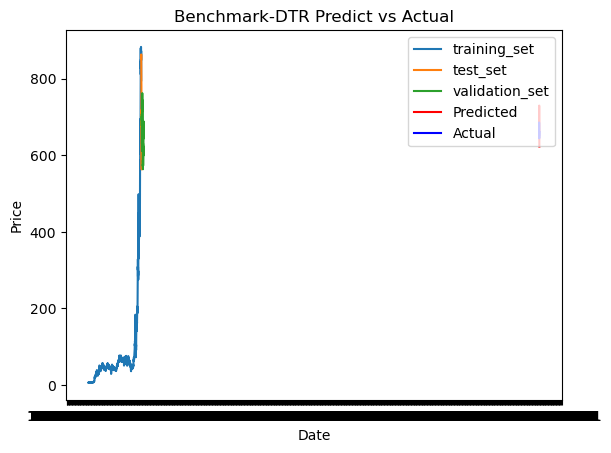

Benchmark-DTR RMSE:  30.97175264177693
Benchmark-DTR R2 score:  -5.558326286964197


In [321]:
#Benchmark - DTR model RMSE and R2 score with plot
RMSE_Score, R2_Score = model_validateResult(model_Benchmark_DTR, model_name = "Benchmark-DTR")

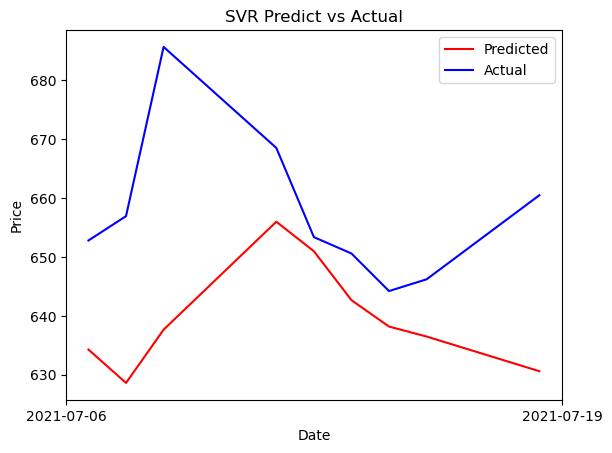

SVR RMSE:  22.86418048437545
SVR R2 score:  -2.5741496696708794


In [322]:
#SVR model
RMSE_Score, R2_Score = model_validateResult(model_SVR, model_name = "SVR")

{'C': 1000.0, 'epsilon': 0}


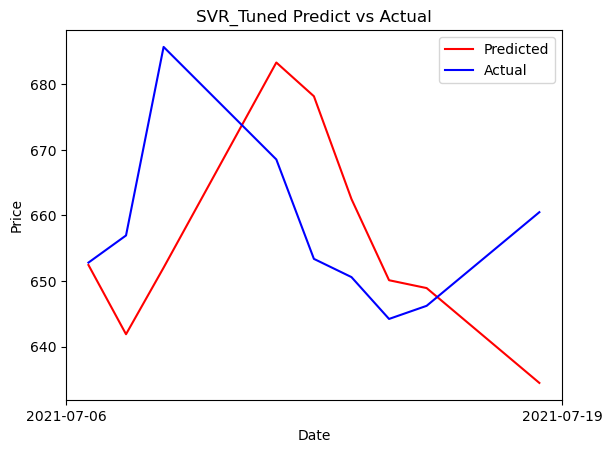

SVR_Tuned RMSE:  18.424451728827194
SVR_Tuned R2 score:  -1.3208688611674506


In [323]:
#SVR model Tuning
RMSE_Score, R2_Score = model_validateResult(model_SVRTuning, model_name = "SVR_Tuned")

In [235]:
#SVR Tuning Model
print("SVR Tuned RMSE_Score : ", RMSE_Score)
print("SVR Tuned R2_Score : ", R2_Score)

SVR Tuned RMSE_Score :  19.885194330353933
SVR Tuned R2_Score :  0.8136135635874626


### Random Forest

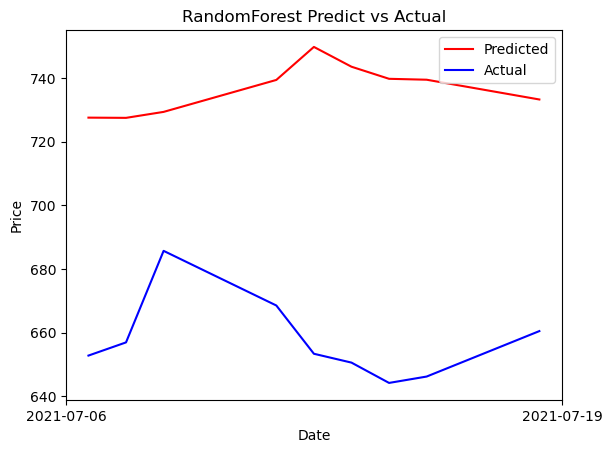

RandomForest RMSE:  80.63636996607352
RandomForest R2 score:  -43.45528441068668


In [324]:
#RF model
#Validate result for randomForest
RMSE_Score, R2_Score = model_validateResult(model_randomForest, "RandomForest")

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}


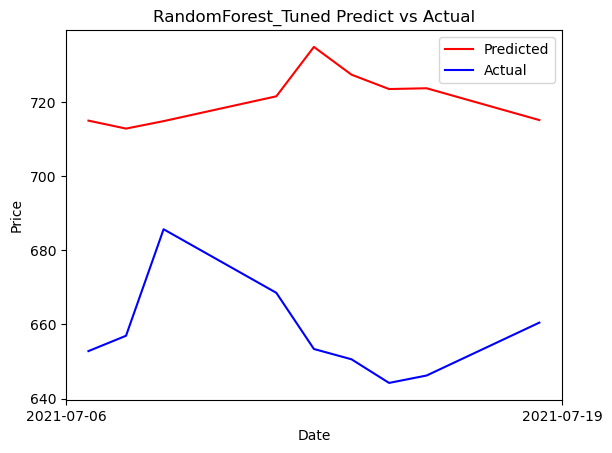

RandomForest_Tuned RMSE:  65.40752073779979
RandomForest_Tuned R2 score:  -28.249391175317253


In [325]:
#Tuned RF model
RMSE_Score, R2_Score = model_validateResult(model_randomForestTuning, "RandomForest_Tuned")

In [238]:
#RF Model
print("RF Tuned RMSE_Score : ", RMSE_Score)
print("RF Tuned R2_Score : ", R2_Score)

RF Tuned RMSE_Score :  483.992219993465
RF Tuned R2_Score :  -109.41584160378396


### LSTM

Epoch 1/200
127/127 [==============================] - 1s 4ms/step - loss: 2577.8623
Epoch 2/200
127/127 [==============================] - 1s 4ms/step - loss: 1733.4551
Epoch 3/200
127/127 [==============================] - 0s 4ms/step - loss: 1457.2896
Epoch 4/200
127/127 [==============================] - 0s 4ms/step - loss: 1249.1624
Epoch 5/200
127/127 [==============================] - 0s 4ms/step - loss: 1092.6189
Epoch 6/200
127/127 [==============================] - 0s 4ms/step - loss: 1007.5823
Epoch 7/200
127/127 [==============================] - 1s 4ms/step - loss: 928.4398
Epoch 8/200
127/127 [==============================] - 1s 5ms/step - loss: 860.7849
Epoch 9/200
127/127 [==============================] - 1s 5ms/step - loss: 822.3700
Epoch 10/200
127/127 [==============================] - 1s 5ms/step - loss: 805.6248
Epoch 11/200
127/127 [==============================] - 1s 4ms/step - loss: 789.7643
Epoch 12/200
127/127 [==============================] - 1s 5ms/step 

127/127 [==============================] - 1s 5ms/step - loss: 78.7400
Epoch 98/200
127/127 [==============================] - 1s 5ms/step - loss: 89.6813
Epoch 99/200
127/127 [==============================] - 1s 4ms/step - loss: 91.1855
Epoch 100/200
127/127 [==============================] - 1s 5ms/step - loss: 90.5101
Epoch 101/200
127/127 [==============================] - 1s 6ms/step - loss: 89.2431
Epoch 00101: early stopping


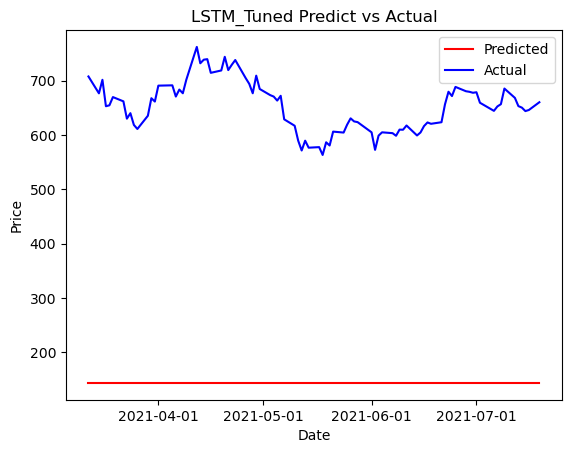

LSTM_Tuned RMSE:  511.4584588757233
LSTM_Tuned R2 score:  -122.30348664380975


In [239]:
#LSTM Tuned
RMSE_Score, R2_Score = model_validateResult(model_LSTMTuning, "LSTM_Tuned")

### Best Model

SVM vs Benchmark- DecisionTreeRegressor

Based on the RSME Score and R2 Score, I am selecting SVM with tuned model as best model for this. Below I am going predict the value with test df.

In [242]:
#SVR_Tuning model validation with test data
RMSE_Score, R2_Score = bestModel_validateResult(model_SVRTuning, model_name = "SVR_Best Model")

{'C': 1000.0, 'epsilon': 0}
SVR_Best Model RMSE:  10.004688121520717
SVR_Best Model R2 score:  0.9977361991163515


In [243]:
#SVR_Tuning model validation with test data
RMSE_Score, R2_Score = bestModel_validateResult(model_SVRTuning, model_name = "SVR_Best Model")

{'C': 1000.0, 'epsilon': 0}
SVR_Best Model RMSE:  10.004688121520717
SVR_Best Model R2 score:  0.9977361991163515


In [245]:
#Benchmark model actual vs prected value
benchmark_tsla = value_Compare(model_Benchmark_DTR)
display(benchmark_tsla)

True_value  Predicted_value
0    163.376007       165.520004
1    163.774002       165.520004
2    164.046005       160.102005
3    161.162003       165.520004
4    167.000000       165.520004
..          ...              ...
197  597.950012       183.483994
198  563.000000       183.483994
199  673.580017       183.483994
200  668.059998       183.483994
201  699.599976       183.483994

[202 rows x 2 columns]